In [1]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

import pickle

import matplotlib

matplotlib.rcParams['text.usetex'] = True

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
dataset_suffix = '2-200-8-50-100-100-0'

datasets = ['eq',
            'matern',
            'noisy-mixture-slow',
            'weakly-periodic-slow']

datasets = [f'{dataset}-{dataset_suffix}' for dataset in datasets]

root = '../../experiments/synthetic/results'

In [3]:
models = [
    ['convGNP', 'meanfield'],
    ['convGNP', 'innerprod'],
    ['convGNP', 'kvv'],
    ['convNP', 'meanfield']
]

model_names = [
    'convgnp-meanfield',
    'convgnp-innerprod',
    'convgnp-kvv',
    'convnp-meanfield'
]

data_names = [ 'eq', 'mat', 'nm', 'wp']

In [4]:
def get_model_log_likelihood(root, dataset, model, cov):
    
    filename = f'{root}/{dataset}/models/{model}/{cov}/homo/identity/seed-0/dim-2/test_log_likelihood.txt'
    
    file = open(filename, 'r')
    nll = file.read()[:-2]
    
    return -float(nll)


def get_oracle_log_likelihood(root, dataset):
    
    filename = f'{root}/{dataset}/models/oracle/seed-0/dim-2/test_nll_mean.txt'
    
    file = open(filename, 'r')
    ll = file.read()[:-2]
    
    filename = f'{root}/{dataset}/models/oracle/seed-0/dim-2/test_diag_nll_mean.txt'
    
    file = open(filename, 'r')
    ll_diag = file.read()[:-2]
    
    return float(ll), float(ll_diag)

In [187]:
markers = ['^', '^', '^', 'X']
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple']
legend_labels = ['ConvGNP (meanfield)', 'ConvGNP (linear)', 'ConvGNP (kvv)', 'ConvNP']
data_types = ['EQ', 'Matern', 'Noisy Mixture', 'Weakly Periodic']

In [188]:
# results = {}

# for data_name, dataset in zip(data_names, datasets):
    
#     _results = {}
    
#     for model_name, (model, cov) in zip(model_names, models):
        
#         loglik = get_model_log_likelihood(root=root,
#                                           dataset=dataset,
#                                           model=model,
#                                           cov=cov)
        
#         _results[model_name] = loglik
        
#     loglik, loglik_diag = get_oracle_log_likelihood(root=root,
#                                                     dataset=dataset)
#     _results['oracle'] = loglik
#     _results['oracle-diag'] = loglik_diag
    
#     results[data_name] = _results

# with open('2d-results.pkl', 'wb') as file:
#     pickle.dump(results, file)

In [189]:
results = None
with open('2d-results.pkl', 'rb') as file:
    results = pickle.load(file)
    
print(results)

{'eq': {'convgnp-meanfield': 0.302009691854432, 'convgnp-innerprod': 0.33180940451644, 'convgnp-kvv': 1.01892188372778, 'convnp-meanfield': 0.452040498886648, 'oracle': 1.1311805898361, 'oracle-diag': 0.39559263047045}, 'mat': {'convgnp-meanfield': -0.214830137724817, 'convgnp-innerprod': -0.176774469021207, 'convgnp-kvv': 0.469952724174766, 'convnp-meanfield': -0.115239317906215, 'oracle': 0.55456364002559, 'oracle-diag': -0.1757482244698}, 'nm': {'convgnp-meanfield': -0.74505748799338, 'convgnp-innerprod': -0.79471449310213, 'convgnp-kvv': 0.118659637749615, 'convnp-meanfield': -0.65123518024901, 'oracle': 0.297727842694501, 'oracle-diag': -0.68659764920263}, 'wp': {'convgnp-meanfield': -1.2745620878197, 'convgnp-innerprod': -1.24805741350938, 'convgnp-kvv': -1.11577138603893, 'convnp-meanfield': -1.2480321440344, 'oracle': -1.00910562064627, 'oracle-diag': -1.241907909823}}


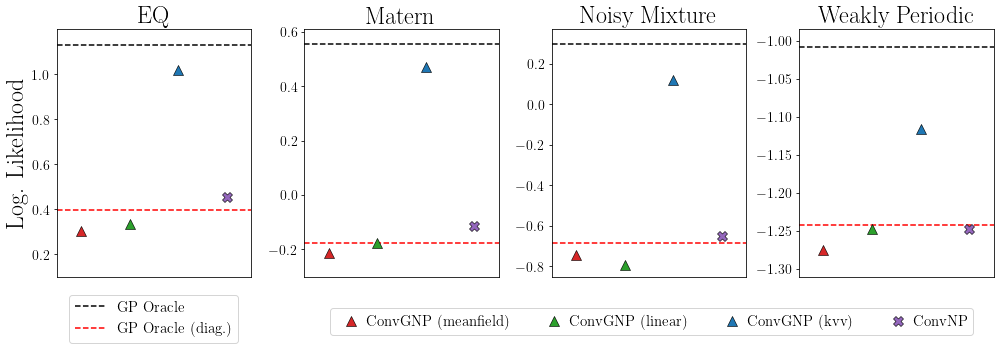

In [202]:
fig = plt.figure(figsize=(14, 5))

for i, (data_name, dataset, _yticks, _ylim) in enumerate(zip(data_names, datasets, yticks, ylim)):
    
    plt.subplot(1, 4, i+1)
    
#     print('===========================================')
    for j, (model_name, (model, cov), (marker, color)) in enumerate(zip(model_names, models, zip(markers, colors))):
        
#         loglik = get_model_log_likelihood(root=root,
#                                           dataset=dataset,
#                                           model=model,
#                                           cov=cov)
        loglik = results[data_name][model_name]
        
#         print(loglik)
        
        plt.scatter(j,
                    loglik,
                    marker=marker,
                    c=color,
                    zorder=2,
                    s=100,
                    linewidth=0.6,
                    edgecolor='k',
                    label=legend_labels[j])
        
#     loglik, loglik_diag = get_oracle_log_likelihood(root=root,
#                                                     dataset=dataset)
    loglik = results[data_name]['oracle']
    loglik_diag = results[data_name]['oracle-diag']
    
    plt.title(f'{data_types[i]}', fontsize=24)
    plt.plot([-0.5, 3.5], [loglik, loglik], '--', color='black', zorder=1, label='GP Oracle')
    plt.plot([-0.5, 3.5], [loglik_diag, loglik_diag], '--', color='red', zorder=1, label='GP Oracle (diag.)')
    plt.xticks([])
    plt.yticks(_yticks, fontsize=14)
    plt.xlim([-0.5, 3.5])
    plt.ylim(_ylim)
    
    if i == 0:
        plt.ylabel('Log. Likelihood', fontsize=24)

#     print("*", loglik)
    
    handles, labels = plt.gca().get_legend_handles_labels()

# fig.legend(handles[:2], labels[:2])
fig.legend(handles[:2], labels[:2], loc='lower left', ncol=1, fontsize=15, bbox_to_anchor=(0.065, 0.015, 0.10, 0.10))
fig.legend(handles[2:], labels[2:], loc='center', ncol=4, fontsize=15, bbox_to_anchor=(0.4, 0.0, 0.5, 0.19), handletextpad=0.01, columnspacing=2.0)
    
plt.tight_layout()
fig.subplots_adjust(bottom=0.22)
plt.savefig('2d-results.pdf')
plt.show()

In [192]:
yticks = [
    np.linspace(0.2, 1.0, 5),
    np.linspace(-0.2, 0.6, 5),
    np.linspace(0.2, -0.8, 6),
    np.linspace(-1.3, -1., 7)
]

ylim = [
    (0.1, 1.2),
    (-0.3, 0.61),
    (-0.85, 0.37),
    (-1.31, -0.985)
]